In [41]:
path_ICON = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc"
path_output = "/home/jvillarreal/Documents/phd/output/ML_output"
path_OUTPUT_RTTOV = "/home/jvillarreal/Documents/phd/github/output-rttov/output-test-2-modis.nc"
rttov_path_refl_emmis = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to19-26-T12.nc"
rttov_path_rad = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-13-data-icon-1-to-36-not-flip.nc"
path_rttov_test = "/home/jvillarreal/Documents/phd/github/output-rttov/rttov-131-data-icon-1to36-T09.nc"
path_ICON_test = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T09.nc"
path_ICON_test_2 = "/work/bb1036/b381362/dataset/data_rttov_T15.nc"



In [ ]:
    #####################
    beta_z = (3/2)*(L/(ds.Reff*1000)) # Q_ext=is 2, and rhow_w = 1000 kg/m3
    T_v = ds.ta/(1-(pv_2013/ds.pres)*(1-0.622))
    g=9.8 # ms^-2
    R=287.058 #m^2s^-2K^-1 (J~kgm^2s^-2)
    #####################################
    ####################################
    cot_lyr = np.zeros((len(ds.height.values), len(ds.lat.values), len( ds.lon.values)))
    cot = np.zeros((len(ds.lat.values), len(ds.lon.values)))

    n_lon = len(ds.lon.values)
    n_lat = len(ds.lat.values)
    n_height = len(ds.height.values)
    for i in range(n_lon): 
        for j in range(n_lat): 
            for k in range(n_height-1): 
                dz = ((R*T_v[k,j,i])/g)*(np.log(ds.pres[k+1,j,i]/ds.pres[k,j,i]))
                cot_lyr[k,j,i] = ((beta_z[k+1,j,i] + beta_z[k,j,i])/2)*dz             

            cot[j,i] = np.nansum(cot_lyr[:,j,i]) 

    ds["cot"]=(['lat', 'lon'],  cot) #this is an array
    ds.cot.attrs['units'] = ""
    ds.cot.attrs['standard_name'] = "COD/COT"
    ds.cot.attrs['long_name'] = "Cloud optical thickness"

    print('===============COT (height 120, lat 57, lon 227) 17.20 um == ', ds.cot_lyr[119, 56-9, 226])
    print("COT min, max", ds.cot.values.min(), np.max(ds.cot.values))


In [1]:
import xarray as xr
from scipy.special import gamma
import numpy as np
from matplotlib import pyplot as plt


In [5]:
ds = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_dropupbottom_Reff.nc")
ds


<xarray.Dataset>
Dimensions:       (lat: 628, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.6 47.61 47.62 47.63 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/20)
    FR_LAND       (lat, lon) float32 ...
    clc           (height, lat, lon) float32 ...
    cli           (height, lat, lon) float32 ...
    clw           (height, lat, lon) float32 ...
    clwvi         (lat, lon) float32 ...
    hus           (height, lat, lon) float32 ...
    ...            ...
    u_10m         (lat, lon) float32 ...
    v_10m         (lat, lon) float32 ...
    lwp           (lat, lon) float32 ...
    Nd_max        (lat, lon) float64 ...
    Nd            (height, lat, lon) float64 ...
    Reff          (height, lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    uuidOfVGrid:  3be5ac35-92f4-4e91-7418-b62336222e20
    title:        ICON simulation
    history:      Sat Jun 18 01:53:52 2022: ncks -d lat,47.599,54.5 /work/bb1...
    references:   see MPIM/DWD publications
    comment:      HDCP2 Sammelaccount (k203095) on m21726 (Linux 2.6.32-696.1...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [16]:
import os
fname ="/work/bb1036/b381362/dataset/data_rttov_T12_dropupbottom_Reff.nc"
name_output= os.path.splitext(fname)[0][:-5] ## - "Reff"
name_output

'/work/bb1036/b381362/dataset/data_rttov_T12_dropupbottom'

In [7]:
import pandas as pd
df_1d = pd.DataFrame({  #falta normalizar
    "Nd_max" : ds.Nd_max.values.flatten(),
    # "LWP" : ds["lwp"].values.flatten()
    "LWP" : ds["lwp"].values.flatten() }) 
df_1d.describe()

,Nd_max,LWP
count,369892.000000,369892.000000
mean,114.661964,62.101212
std,170.231963,126.286911
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.015653,2.493243
75%,194.732379,70.504786
max,3446.759207,4600.840332


In [9]:
n_zeros1 = np.count_nonzero(df_1d["Nd_max"]==0)
n_zeros2 = np.count_nonzero( df_1d["LWP"]==0)
"Nd zeros:", n_zeros1, "LWP zeros:", n_zeros2

('Nd zeros:', 117448, 'LWP zeros:', 157627)

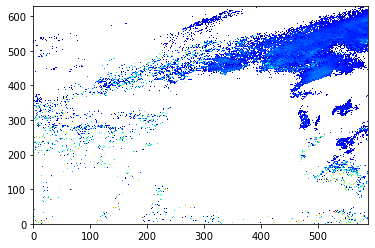

In [3]:
plt.pcolormesh(ds.Reff[119], cmap ='jet') #, vmin=0,vmax=55) #cmap=cmap.N, norm=norm)


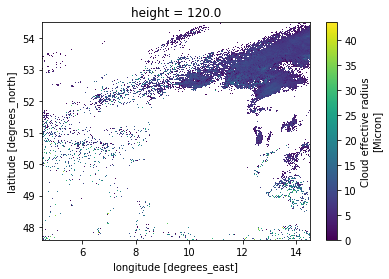

In [4]:
ds.Reff[119].plot()#, vmin=0,vmax=55) #cmap=cmap.N, norm=norm)


In [4]:
ds = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_Reff_cut.nc")
ds

<xarray.Dataset>
Dimensions:       (lat: 628, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.6 47.61 47.62 47.63 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/20)
    FR_LAND       (lat, lon) float32 ...
    Nd            (height, lat, lon) float64 ...
    Nd_max        (lat, lon) float64 ...
    Reff          (height, lat, lon) float64 ...
    clc           (height, lat, lon) float32 ...
    cli           (height, lat, lon) float32 ...
    ...            ...
    t_s           (lat, lon) float32 ...
    ta            (height, lat, lon) float32 ...
    tas           (lat, lon) float32 ...
    topography_c  (lat, lon) float32 ...
    u_10m         (lat, lon) float32 ...
    v_10m         (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    uuidOfVGrid:  3be5ac35-92f4-4e91-7418-b62336222e20
    title:        ICON simulation
    history:      Wed Jun 15 17:49:52 2022: ncks -d lat,47.599,54.5 /work/bb1...
    references:   see MPIM/DWD publications
    comment:      HDCP2 Sammelaccount (k203095) on m21726 (Linux 2.6.32-696.1...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [5]:
T_c =  np.float64(ds.ta) - 273.15
print(T_c.min(),T_c.max())
esat_2013 = 0.611* np.exp((17.3*T_c)/(T_c+237.3))*1000.0
#esat_2013 = np.ma.masked_array(esat_2013,  esat_2013 == 0) ## check it!!!!!!!!
print(esat_2013.min(),esat_2013.max())

pres = np.ma.masked_array(ds.pres,  ds.pres == 0) ## check it!!!!!!!!
print(pres.min(),pres.max())

qs_2013 =  0.622* (esat_2013/pres)
print(qs_2013.min(),qs_2013.max())
r_2013 = ds.hus/(1 - ds.hus)
print(r_2013.min(),r_2013.max())
RH_2013 = 100*(r_2013/qs_2013)
print(RH_2013.min(),RH_2013.max())
pv_2013 = (esat_2013 * RH_2013)/100.0
print(pv_2013.min(),pv_2013.max())
pd_2013 = ds.pres - pv_2013
print(pd_2013.min(),pd_2013.max())
rho_2013 = (pd_2013/(287.058 * ds.ta)) + (pv_2013/(461.495 * ds.ta))  #nana
print(rho_2013.min(),rho_2013.max())

#-----------------Calculation of the Reff -------------------------
L  = rho_2013*ds.clw # in kgm^-3
N = rho_2013*ds.qnc # im m^-3
# L.where(L == 0, np.Nan, L)
# N.where(N < 2.0e+06, np.Nan, N) !! ask DIPU
######constant for size distribution #############
nu = 1.0
mu = 1.0
a = 1.24E-01
b = 1/3

-62.570516967773415 22.842156982421898
1.2460492424413752 2790.9808998945614
4933.3687 103661.13
3.584466855046453e-05 0.01763056200402201
<xarray.DataArray 'hus' ()>
array(2.48952415e-06) <xarray.DataArray 'hus' ()>
array(0.01160216)
<xarray.DataArray 'hus' ()>
array(0.61525011) <xarray.DataArray 'hus' ()>
array(115.79605846)
<xarray.DataArray 'hus' ()>
array(0.03072338) <xarray.DataArray 'hus' ()>
array(1801.70568026)
<xarray.DataArray ()>
array(4933.33742426) <xarray.DataArray ()>
array(102557.86554564)
<xarray.DataArray ()>
array(0.07751149) <xarray.DataArray ()>
array(1.2806839)


In [6]:
print("N",np.max(N), N.min())


N <xarray.DataArray ()>
array(3.44675921e+09) <xarray.DataArray ()>
array(0.)


In [7]:
L  = rho_2013*ds.clw # in kgm^-3
N = rho_2013*ds.qnc # im m^-3

L2 = np.ma.masked_array(L,  L == 0) ## check it!!!!!!!!
N2 = np.ma.masked_array(N,  N < 2.0e+06) ## check it!!!!!!!!

###################################
reff_2013 = (a/2) * (gamma((3*b+nu+1)/(mu))/gamma((2*b+nu+1)/(mu)))*((L2/N2)*(gamma((nu+1)/(mu))/gamma((nu+2)/mu)))**(b)
reff_2013 = reff_2013*1E6
print("Reff",np.max(reff_2013), reff_2013.min())

Reff 51.41350521665602 7.933216967374964e-11


In [8]:
L  = rho_2013*ds.clw # in kgm^-3
N = rho_2013*ds.qnc # im m^-3

#L2 = np.ma.masked_array(L,  L == 0) ## check it!!!!!!!!
N2 = np.ma.masked_array(N,  N < 2.0e+06) ## check it!!!!!!!!

###################################
reff_2013 = (a/2) * (gamma((3*b+nu+1)/(mu))/gamma((2*b+nu+1)/(mu)))*((L/N2)*(gamma((nu+1)/(mu))/gamma((nu+2)/mu)))**(b)
reff_2013 = reff_2013*1E6
print("Reff",np.max(reff_2013), reff_2013.min())

Reff <xarray.DataArray ()>
array(51.41350522) <xarray.DataArray ()>
array(0.)


In [16]:
reff_2013

<xarray.DataArray (height: 150, lat: 628, lon: 589)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 147.0 148.0 149.0 150.0
  * lat      (lat) float64 47.6 47.61 47.62 47.63 ... 54.46 54.47 54.48 54.5
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5

In [14]:
ds["Reff2"] =  reff_2013 #thi is a xarray.DataArray
ds.Reff2.attrs['units'] = "Micron"
ds.Reff2.attrs['standard_name'] = "Reff"
ds.Reff2.attrs['long_name'] = "Cloud effective radius"

MissingDimensionsError: cannot set variable 'Reff2' with 3-dimensional data without explicit dimension names. Pass a tuple of (dims, data) instead.

In [9]:
ds.Reff2.max(), ds.Reff2.min()

(<xarray.DataArray 'Reff2' ()>
 array(51.41350522),
 <xarray.DataArray 'Reff2' ()>
 array(0.))

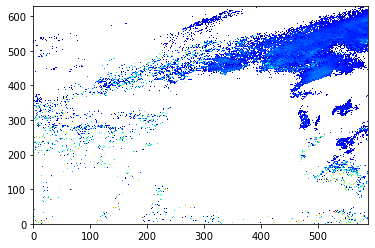

In [11]:
plt.pcolormesh(ds.Reff2[119], cmap ='jet') #, vmin=0,vmax=55) #cmap=cmap.N, norm=norm)


AttributeError: 'Rectangle' object has no property 'vmin'

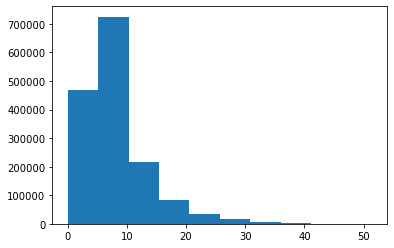

In [29]:
# air2d = L.isel(height=119)

reff_2013.plot(vmin=0,vmax=55)

In [5]:
print("Reff",np.max(reff_2013), reff_2013.min())


Reff 51.41350521665602 7.933216967374964e-11


In [7]:
b =reff_2013
b

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]],

        ...,

        [[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --,

In [30]:
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', ds.Reff[119, 56, 226])

===============Reff (height 120, lat 57, lon 227) 17.20 um ==  <xarray.DataArray ()>
array(17.20233612)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342


In [40]:
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', ds.Reff[119, 56-9, 226])

===============Reff (height 120, lat 57, lon 227) 17.20 um ==  <xarray.DataArray 'Reff' ()>
array(17.202336)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342
Attributes:
    units:          Micron
    standard_name:  Reff
    long_name:      Cloud effective radius


In [43]:
import pandas as pd

df_1d = pd.DataFrame({  #falta normalizar
    "Reff" : ds.Reff.values.flatten() }) 
df_1d.describe()


,Reff
count,2.486024e+06
mean,inf
std,NaN
min,0.000000e+00
25%,4.212784e+00
50%,7.867323e+00
75%,1.915845e+01
max,inf


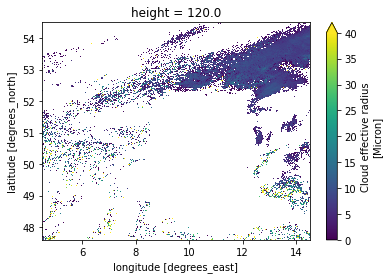

In [45]:
air2d = ds.Reff.isel(height=119)

air2d.plot(vmin=0,vmax=40)

-62.570516967773415 22.842156982421898
1.2460492424413752 2790.9808998945614
4933.3687 103661.13
3.584466855046453e-05 0.01763056200402201
<xarray.DataArray 'hus' ()>
array(2.48952415e-06) <xarray.DataArray 'hus' ()>
array(0.01160216)
<xarray.DataArray 'hus' ()>
array(0.61525011) <xarray.DataArray 'hus' ()>
array(115.79605846)
<xarray.DataArray 'hus' ()>
array(0.03072338) <xarray.DataArray 'hus' ()>
array(1801.70568026)
<xarray.DataArray ()>
array(4933.33742426) <xarray.DataArray ()>
array(102557.86554564)
<xarray.DataArray ()>
array(0.07751149) <xarray.DataArray ()>
array(1.2806839)


In [ ]:
ds["Reff"] =  reff_2013 #thi is a xarray.DataArray
ds.Reff.attrs['units'] = "Micron"
ds.Reff.attrs['standard_name'] = "Reff"
ds.Reff.attrs['long_name'] = "Cloud effective radius"

In [46]:
L.max(), L.min()

(<xarray.DataArray ()>
 array(0.00303497),
 <xarray.DataArray ()>
 array(0.))

In [47]:
N.max(), N.min()

(<xarray.DataArray ()>
 array(3.44675921e+09),
 <xarray.DataArray ()>
 array(0.))

In [14]:
np.nanmax(reff_2013.values), reff_2013.values.min()

(inf, nan)

In [15]:
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', reff_2013[119-9, 56, 226])

===============Reff (height 120, lat 57, lon 227) 17.20 um ==  <xarray.DataArray ()>
array(nan)
Coordinates:
    height   float64 111.0
    lat      float64 48.12
    lon      float64 8.342


In [18]:
cdnc_2013_cm = (rho_2013 * ds.qnc)/1000000 # convert to cm^-3
print(cdnc_2013_cm.min(),cdnc_2013_cm.max())

Nd_max = np.nanmax(cdnc_2013_cm, axis = 0)
print(Nd_max.min(),Nd_max.max())

ds = ds.assign(lwp = ds.clwvi*1000)
print(ds.lwp.min(),ds.lwp.max())

<xarray.DataArray ()>
array(0.) <xarray.DataArray ()>
array(3446.75920724)
0.0 3446.759207242138
<xarray.DataArray 'lwp' ()>
array(0.) <xarray.DataArray 'lwp' ()>
array(4600.84033203)


In [28]:
np.nanmax(reff_2013), reff_2013.min()

(inf,
 <xarray.DataArray ()>
 array(0.))

In [31]:
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', reff_2013[119-9, 56, 226])

===============Reff (height 120, lat 57, lon 227) 17.20 um ==  <xarray.DataArray ()>
array(nan)
Coordinates:
    height   float64 111.0
    lat      float64 48.22
    lon      float64 8.342


In [29]:
reff_2013

<bound method ImplementsArrayReduce._reduce_method.<locals>.wrapped_func of <xarray.DataArray (height: 150, lat: 628, lon: 589)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],


In [26]:
reff_2013_a = np.ma.masked_array(reff_2013,  reff_2013 != -np.inf) ## check it!!!!!!!!
np.nanmax(reff_2013_a)

masked

In [9]:
#####################
beta_z = (3/2)*(L/(ds.Reff*1000)) # Q_ext=is 2, and rhow_w = 1000 kg/m3
T_v = ds.ta/(1-(pv_2013/ds.pres)*(1-0.622))
g=9.8 # ms^-2
R=287.058 #m^2s^-2K^-1 (J~kgm^2s^-2)
#####################################
####################################
cot_lyr = np.zeros((len(ds.height.values), len(ds.lat.values), len( ds.lon.values)))
cot = np.zeros((len(ds.lat.values), len(ds.lon.values)))

In [21]:
arr = np.empty((5,5))
arr[:] = np.NaN
print(arr)

[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In [28]:
np.shape(cot), np.shape(cot_lyr)

((628, 589), (150, 628, 589))

In [11]:
len(ds.lon.values)

589

In [12]:
n_lon = 2 #len(ds.lon.values)
n_lat = 2 #len(ds.lat.values)
n_height = 3 #len(ds.height.values)
for i in range(n_lon): 
    for j in range(n_lat): 
        for k in range(n_height-1): 
            dz = ((R*T_v[k,j,i])/g)*(np.log(ds.pres[k+1,j,i]/ds.pres[k,j,i]))
            cot_lyr[k,j,i] = ((beta_z[k+1,j,i] + beta_z[k,j,i])/2)*dz             
       
        cot[j,i] = np.nansum(cot_lyr[:,j,i]) 

In [19]:
cot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
print("COT min, max", ds.cot.values.min(), np.max(ds.cot.values))


COT min, max 0.0 0.0


In [15]:
ds["cot"]=(['lat', 'lon'],  cot) #this is an array
ds.cot.attrs['units'] = ""
ds.cot.attrs['standard_name'] = "COD/COT"
ds.cot.attrs['long_name'] = "Cloud optical thickness"



In [ ]:
ds["cot"].plot(cmap = "jet") #,vmin=2, vmax = 1200)


In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(121)
ds["lwp2"] =ds.clwvi*1000
ds["lwp2"] .where(ds["lwp2"] != 0).plot(cmap = "jet",vmin=2, vmax = 1200)


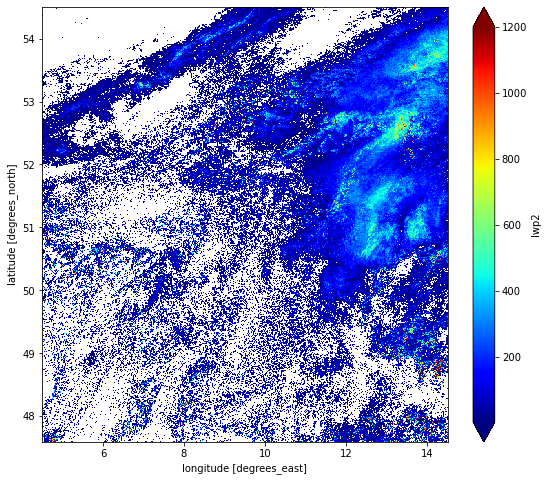

In [3]:

# ds = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12.nc")
#ds = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_Reff_cut.nc")
ds2 = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_Reff_cut.nc")


ds2

plt.figure(figsize=(20, 8))
plt.subplot(121)
ds2["lwp2"] =ds2.clwvi*1000
ds2["lwp2"].where(ds2["lwp2"] != 0).plot(cmap = "jet",vmin=2, vmax = 1200)


In [5]:
(ds.clwvi[9:,:]==ds2.clwvi).all()

<xarray.DataArray 'clwvi' ()>
array(False)

In [5]:
import pandas as pd

df_1d = pd.DataFrame({  #falta normalizar
    "Nd_max" : ds2.Nd_max.values.flatten(),
    # "LWP" : ds["lwp"].values.flatten()
    "LWP" : ds2["lwp"].values.flatten() }) 
df_1d.describe()

n_zeros1 = np.count_nonzero(df_1d["Nd_max"]==0)
n_zeros2 = np.count_nonzero( df_1d["LWP"]==0)
n_zeros1, n_zeros2

(117448, 157627)

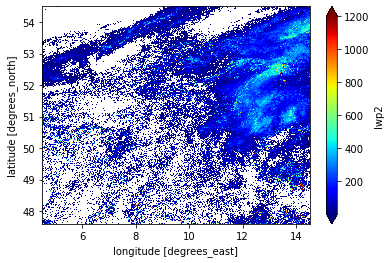

In [11]:
ds["lwp2"].where(ds["lwp2"] != 0).plot(cmap = "jet",vmin=2, vmax = 1200)


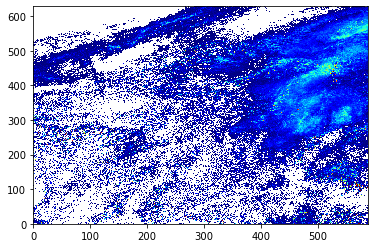

In [15]:
lwp_2013 = np.ma.masked_array(ds["lwp2"],  ds["lwp2"] == 0) ## check it!!!!!!!!

plt.pcolormesh(lwp_2013, cmap ='jet', vmin=2, vmax = 1200 ) #cmap=cmap.N, norm=norm)


In [20]:
import pandas as pd

df_1d = pd.DataFrame({  #falta normalizar
    "Nd_max" : ds.Nd_max.values.flatten(),
    # "LWP" : ds["lwp"].values.flatten()
    "LWP" : ds["lwp"].values.flatten() }) 
df_1d.describe()

,Nd_max,LWP
count,369892.000000,369892.000000
mean,114.661964,62.101212
std,170.231963,126.286911
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.015653,2.493243
75%,194.732379,70.504786
max,3446.759207,4600.840332


In [9]:
T_c =  np.float64(ds.ta) - 273.15
print(T_c.min(),T_c.max())
esat_2013 = 0.611* np.exp((17.3*T_c)/(T_c+237.3))*1000.0
#esat_2013 = np.ma.masked_array(esat_2013,  esat_2013 == 0) ## check it!!!!!!!!
print(esat_2013.min(),esat_2013.max())

pres = np.ma.masked_array(ds.pres,  ds.pres == 0) ## check it!!!!!!!!
print(pres.min(),pres.max())

qs_2013 =  0.622* (esat_2013/pres)
print(qs_2013.min(),qs_2013.max())
r_2013 = ds.hus/(1 - ds.hus)
print(r_2013.min(),r_2013.max())
RH_2013 = 100*(r_2013/qs_2013)
print(RH_2013.min(),RH_2013.max())
pv_2013 = (esat_2013 * RH_2013)/100.0
print(pv_2013.min(),pv_2013.max())
pd_2013 = ds.pres - pv_2013
print(pd_2013.min(),pd_2013.max())
rho_2013 = (pd_2013/(287.058 * ds.ta)) + (pv_2013/(461.495 * ds.ta))  #nana
print(rho_2013.min(),rho_2013.max())

-62.570516967773415 22.842156982421898
1.2460492424413752 2790.9808998945614
4933.3687 103661.13
3.584466855046453e-05 0.01763056200402201
<xarray.DataArray 'hus' ()>
array(2.48952415e-06) <xarray.DataArray 'hus' ()>
array(0.01160216)
<xarray.DataArray 'hus' ()>
array(0.61525011) <xarray.DataArray 'hus' ()>
array(115.79605846)
<xarray.DataArray 'hus' ()>
array(0.03072338) <xarray.DataArray 'hus' ()>
array(1801.70568026)
<xarray.DataArray ()>
array(4933.33742426) <xarray.DataArray ()>
array(102557.86554564)
<xarray.DataArray ()>
array(0.07751149) <xarray.DataArray ()>
array(1.2806839)


<xarray.DataArray ()>
array(0.) <xarray.DataArray ()>
array(3446.75920724)
0.0 3446.759207242138
<xarray.DataArray 'lwp' ()>
array(0.) <xarray.DataArray 'lwp' ()>
array(6158.81933594)


In [ ]:


ds.lwp.attrs['units'] = "gm-2"
ds.lwp.attrs['standard_name'] = "LWP"
ds.lwp.attrs['long_name'] = "Liquid water path"



ds["Nd_max"]=(['lat', 'lon'],  Nd_max) #this is an array
ds.Nd_max.attrs['units'] = "cm-3"
ds.Nd_max.attrs['standard_name'] = "Nd_max"
ds.Nd_max.attrs['long_name'] = "Cloud dropler number maximun"

ds["Nd"] =  cdnc_2013_cm #thi is a xarray.DataArray
ds.Nd.attrs['units'] = "cm-3"
ds.Nd.attrs['standard_name'] = "Nd"
ds.Nd.attrs['long_name'] = "Cloud dropler number in each layer"


#-----------------Calculation of the Reff -------------------------
L  = rho_2013*ds.clw # in kgm^-3
N = rho_2013*ds.qnc # im m^-3
# L.where(L == 0, np.Nan, L)
# N.where(N < 2.0e+06, np.Nan, N) !! ask DIPU
######constant for size distribution #############
nu = 1.0
mu = 1.0
a = 1.24E-01
b = 1/3

###################################
reff_2013 = (a/2) * (gamma((3*b+nu+1)/(mu))/gamma((2*b+nu+1)/(mu)))*((L/N)*(gamma((nu+1)/(mu))/gamma((nu+2)/mu)))**(b)
reff_2013 = reff_2013*1E6

ds["Reff"] =  reff_2013 #thi is a xarray.DataArray
ds.Reff.attrs['units'] = "Micron"
ds.Reff.attrs['standard_name'] = "Reff"
ds.Reff.attrs['long_name'] = "Cloud effective radius"


In [ ]:
print("next values only work with data_rttov_12")
print('===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 == ', ds.ta[119, 56, 226])
print('===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315== ', T_c[119, 56, 226])
print('===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 == ', esat_2013[119, 56, 226]) #3 mmmmm no sale igual
print('===============p_2013 (height 120, lat 57, lon 227)75935.328125 == ', ds.pres[119, 56, 226]) 
print('===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  == ', qs_2013[119, 56, 226]) #3 mmmmm no sale igual
print('===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 == ', r_2013[119, 56, 226])
print('===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 == ', RH_2013[119, 56, 226])
print('===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 == ', pv_2013[119, 56, 226])
print('===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 == ', pd_2013[119, 56, 226])
print('===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 == ', rho_2013[119, 56, 226]) #3 mmmmm no sale igual
print('===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 == ', cdnc_2013_cm[119, 56, 226])
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', reff_2013[119, 56, 226])
ds.to_netcdf('/home/jvillarreal/Documents/phd/dataset/data_rttov_T12_reff.nc') 

In [21]:
 #(ds.Nd_max.values[9:,:]==Nd_max).all()

True

In [17]:
i= 205
j= 57
print(np.max(cdnc_2013_cm[:,i,j].values),'debe ser igual to', Nd_max[i,j])


10.791630001595426 debe ser igual to 10.791630001595426


In [52]:
import pandas as pd

df_1d = pd.DataFrame({  #falta normalizar
    "Nd_max" : ds.Nd_max.values.flatten(),
    # "LWP" : ds["lwp"].values.flatten()
    "LWP" : ds["lwp"].values.flatten() }) 
df_1d.describe()

,Nd_max,LWP
count,369892.000000,375193.000000
mean,114.661964,59.209698
std,170.231963,121.161110
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.015653,2.529513
75%,194.732379,67.780930
max,3446.759207,6158.819336


In [3]:
ds = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_Reff.nc")
ds2 = xr.open_dataset("/work/bb1036/b381362/dataset/data_rttov_T12_Reff_cut.nc")
# ds = xr.open_dataset("/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc")
ds2

<xarray.Dataset>
Dimensions:       (lat: 628, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.6 47.61 47.62 47.63 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/20)
    FR_LAND       (lat, lon) float32 ...
    Nd            (height, lat, lon) float64 ...
    Nd_max        (lat, lon) float64 ...
    Reff          (height, lat, lon) float64 ...
    clc           (height, lat, lon) float32 ...
    cli           (height, lat, lon) float32 ...
    ...            ...
    t_s           (lat, lon) float32 ...
    ta            (height, lat, lon) float32 ...
    tas           (lat, lon) float32 ...
    topography_c  (lat, lon) float32 ...
    u_10m         (lat, lon) float32 ...
    v_10m         (lat, lon) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.4
    uuidOfVGrid:  3be5ac35-92f4-4e91-7418-b62336222e20
    title:        ICON simulation
    history:      Wed Jun 15 11:06:10 2022: ncks -d lat,47.599,54.5 /work/bb1...
    references:   see MPIM/DWD publications
    comment:      HDCP2 Sammelaccount (k203095) on m21726 (Linux 2.6.32-696.1...
    NCO:          netCDF Operators version 5.0.6 (Homepage = http://nco.sf.ne...
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...

In [6]:
ds2["Nd_max"][:2,:]

<xarray.DataArray 'Nd_max' (lat: 2, lon: 589)>
array([[  0.      ,   0.      ,   0.      , ...,  92.653012,  99.895502,
          0.      ],
       [  0.      ,   0.      ,  70.424703, ...,  82.186069, 113.765356,
          0.      ]])
Coordinates:
  * lat      (lat) float64 47.6 47.61
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Attributes:
    units:          cm-3
    standard_name:  Nd_max
    long_name:      Cloud dropler number maximun

In [7]:
ds.lat[0:10]

<xarray.DataArray 'lat' (lat: 10)>
array([47.5  , 47.511, 47.522, 47.533, 47.544, 47.555, 47.566, 47.577, 47.588,
       47.599])
Coordinates:
  * lat      (lat) float64 47.5 47.51 47.52 47.53 ... 47.57 47.58 47.59 47.6
Attributes:
    standard_name:  latitude
    long_name:      latitude
    units:          degrees_north
    axis:           Y

In [8]:
ds["Nd_max"][:10,:]

<xarray.DataArray 'Nd_max' (lat: 10, lon: 589)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [ 0.      ,  0.      ,  0.      , ..., 92.653012, 99.895502,  0.      ]])
Coordinates:
  * lat      (lat) float64 47.5 47.51 47.52 47.53 ... 47.57 47.58 47.59 47.6
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Attributes:
    units:          cm-3
    standard_name:  Nd_max
    long_name:      Cloud dropler number maximun

In [53]:
import pandas as pd

df_d = pd.DataFrame({  #falta normalizar
    "Nd_max" : (ds.Nd_max[9:,:].values).flatten(),
    # "LWP" : ds["lwp"].values.flatten()
    "LWP" : ds["lwp"][9:,:].values.flatten()

}) 
df_d.describe()

,Nd_max,LWP
count,369892.000000,369892.000000
mean,114.661964,59.349442
std,170.231963,119.943024
min,0.000000,0.000000
25%,0.000000,0.000000
50%,15.015653,2.687319
75%,194.732379,68.916622
max,3446.759207,6158.819336


In [50]:
df_1d

,Nd_max,LWP
0,0.000000,0.000000
1,0.000000,0.000000
2,0.000000,0.000000
3,12.242780,0.000000
4,22.199962,0.000000
...,...,...
369887,61.928620,0.000000
369888,8.552532,96.927086
369889,90.854551,0.000000
369890,99.569847,10.177068


In [ ]:
(117448, 157627)

In [46]:
n_zeros = np.count_nonzero(df_1d["Nd_max"]==0)
n_zeros

117448

In [49]:
n_zeros = np.count_nonzero( df_1d["LWP"]==0)
n_zeros

156997

In [37]:
117448 - 159978

-42530

In [23]:
np.size(Nd_max)

375193

In [24]:
369892 - 375193

-5301

In [33]:
375193 - 375193

0

<xarray.DataArray 'lwp' ()>
array(0.) <xarray.DataArray 'lwp' ()>
array(6158.81933594)


/tmp/ipykernel_3876620/2696298162.py:8: RuntimeWarning: All-NaN axis encountered
  Nd_max = np.nanmax(cdnc_2013_cm, axis = 0)


nan nan


In [ ]:
ds.close()

In [3]:
#https://geohackweek.github.io/nDarrays/09-masking/ masking array

In [16]:
#https://docs.xarray.dev/en/stable/user-guide/data-structures.html#dictionary-like-methods

<xarray.Dataset>
Dimensions:       (lat: 637, lon: 589, height: 150)
Coordinates:
  * height        (height) float64 1.0 2.0 3.0 4.0 ... 147.0 148.0 149.0 150.0
  * lat           (lat) float64 47.5 47.51 47.52 47.53 ... 54.47 54.48 54.5
  * lon           (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Data variables: (12/21)
    FR_LAND       (lat, lon) float32 1.0 1.0 1.0 1.0 1.0 ... 0.0 0.0 0.0 0.0 0.0
    cct           (lat, lon) float32 0.0 0.0 0.0 0.0 ... -999.0 7.681e+04 0.0
    clc           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    cli           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clw           (height, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    clwvi         (lat, lon) float32 0.0 8.124e-06 8.124e-06 ... 0.01018 0.04625
    ...            ...
    tas           (lat, lon) float32 289.8 289.9 289.9 ... 279.3 279.4 279.3
    topography_c  (lat, lon) float32 411.2 411.7 411.7 393.6 ... 0.0 0.0 0.

/home/jvillarreal/Documents/phd/github/ICON_RTTOV/code_test/lwp_nd.py:39: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  276.40933
===============T_c (height 120, lat 57, lon 227) cm: 3.00115356445315==  3.2593384
===============esat_2013 (height 120, lat 57, lon 227) 758.360598313415 ==  772.3939
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  76403.13
===============qs_2013 (height 120, lat 57, lon 227) 0.00621186875461262  ==  0.00628808
===============r_2013 (height 120, lat 57, lon 227) 0.0062973626597643 ==  0.004533605
===============RH_2013 (height 120, lat 57, lon 227) 101.376299283339 ==  72.098404
===============pv_2013 (height 120, lat 57, lon 227) 768.797909793127 ==  556.88367
===============pd_2013 (height 120, lat 57, lon 227) 75166.5302152069 ==  75846.25
===============rho_2013 (height 120, lat 57, lon 227) 0.954250058491486 ==  0.960264
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  0.0


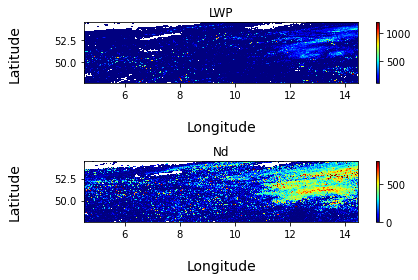

In [1]:

from lwp_nd import lwp_nd_input_ICON

path_ICON = "/home/jvillarreal/Documents/phd/dataset/data_rttov_T12.nc"
path_output = "/home/jvillarreal/Documents/phd/output/input_icon"
ds,p_2013, T_2013, q_2013, max_cdnc_2013_cm, lwp_2013, lat, lon, height = lwp_nd_input_ICON(path_output = path_output,  path_ICON = path_ICON)


In [1]:
import xarray as xr
ds = xr.open_dataset("/home/jvillarreal/Documents/phd/dataset/data_rttov_T12_Reff.nc")

In [2]:

print("next values only work with data_rttov_12")
print('===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 == ', ds.ta[119, 56, 226])
print('===============p_2013 (height 120, lat 57, lon 227)75935.328125 == ', ds.pres[119, 56, 226]) 
print('===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 == ', ds.Nd[119, 56, 226])
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', ds.Reff[119, 56, 226])


next values only work with data_rttov_12
===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  <xarray.DataArray 'ta' ()>
array(276.15115, dtype=float32)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0
    cell_methods:   time: mean
    institution:    MPIMET
===============p_2013 (height 120, lat 57, lon 227)75935.328125 ==  <xarray.DataArray 'pres' ()>
array(75935.33, dtype=float32)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342
Attributes:
    standard_name:  air_pressure
    long_name:      Pressure
    units:          Pa
    param:          0.3.0
    cell_methods:   time: mean
    institution:    MPIMET
===============cdnc_2013_cm (height 120, lat 57, lon 227) 15.5508091629487 ==  <xarray.DataArray 'Nd' ()>
array(15.550809)
Coordinates:
    

In [3]:
print('===============Reff (height 120, lat 57, lon 227) 17.20 um == ', ds.Reff[119, 56, 226])


===============Reff (height 120, lat 57, lon 227) 17.20 um ==  <xarray.DataArray 'Reff' ()>
array(17.202336)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342
Attributes:
    units:          Micron
    standard_name:  Reff
    long_name:      Cloud effective radius


In [8]:
import numpy as np
np.max(ds.Reff[9:,:])

<xarray.DataArray 'Reff' ()>
array(inf)

In [9]:
ds.Reff.min(), ds.Reff.max()

(<xarray.DataArray 'Reff' ()>
 array(0.),
 <xarray.DataArray 'Reff' ()>
 array(inf))

In [18]:
arr = ds.Reff[:,:]

In [20]:
arr

<xarray.DataArray 'Reff' (height: 150, lat: 637, lon: 589)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 147.0 148.0 149.0 150.0
  * lat      (lat) float64 47.5 47.51 47.52 47.53 ... 54.46 54.47 54.48 54.5
  * lon      (lon) float64 4.5 4.517 4.534 4.551 ... 14.45 14.46 14.48 14.5
Attributes:
    units:          Micron
    standard_name:  Reff
    long_name:      Cloud effective radius

In [13]:
import pandas as pd
df_1d = pd.DataFrame({  #falta normalizar
        "Reff" : ds["Reff"].values[:,:].flatten()}) 

In [24]:
np.max(np.nanmax(ds.Reff.values, axis = 0))


<ipython-input-24-847ef9aaf498>:1: RuntimeWarning: All-NaN slice encountered
  np.max(np.nanmax(ds.Reff.values, axis = 0))


nan

In [14]:
df_1d.describe()


,Reff
count,2.486024e+06
mean,inf
std,NaN
min,0.000000e+00
25%,4.212784e+00
50%,7.867323e+00
75%,1.915845e+01
max,inf


===============T_2013 (height 120, lat 57, lon 227) cm: 276.151153564453 ==  <xarray.DataArray 'ta' ()>
array(276.15115, dtype=float32)
Coordinates:
    height   float64 120.0
    lat      float64 48.12
    lon      float64 8.342
Attributes:
    standard_name:  air_temperature
    long_name:      Temperature
    units:          K
    param:          0.0.0
    cell_methods:   time: mean
    institution:    MPIMET


NameError: name 'T_c' is not defined

In [ ]:
#x = lon
#y = lat
x,y = np.meshgrid(lon,lat)
z = variable

levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
# cmap = plt.colormaps['PiYG']
# norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)


im = ax.pcolormesh(x, y, z, cmap ='jet', vmin=vmin, vmax = vmax ) #cmap=cmap.N, norm=norm)
fig.colorbar(im, ax=ax)
ax.set_title(title_plot)

# ax.set_title("{}{}".format(title_subplot, band),fontsize=14)
ax.set_xlabel('Longitude', labelpad=20,fontsize=14)
ax.set_ylabel('Latitude', labelpad=33,fontsize=14)

    
    

In [ ]:
df = df.fillna(0) 

In [ ]:
lwp.plot()

In [ ]:
lwp.where(lwp != 0, x, NAN)

In [ ]:
max_cdnc_2013_cm = np.ma.masked_array(max_cdnc_2013_cm,  max_cdnc_2013_cm == 0) ## check it!!!!!!!!
lwp_2013 = np.ma.masked_array(lwp_2013,  lwp_2013 == 0) ## check it!!!!!!!!


In [ ]:
!ls /work/bb1036/b381362/dataset

In [ ]:
!ncdump -h /work/bb1036/b381362/dataset/data_rttov_T15.nc

In [ ]:
import xarray as xr
from lwp_nd import lwp_nd_input_ICON


In [ ]:
ds = xr.open_dataset(path_ICON_test_2).compute()


print(ds)           #heightxlatxlon  HxW
lwp_2013_a = ds['clwvi'].values[9:,:] #kg m**-2     #thereare nand en la parte baje check why 2d los demas 3D
lwp_2013 = lwp_2013_a*1000 # g/m^2 Liquid water path
qnc_2013 = ds['qnc'].values[:,9:,:] #kg-1    
T_2013 = ds['ta'].values[:,9:,:]     #testtt dataaa!! instead of values
q_2013 = ds['hus'].values[:,9:,:]   
p_2013  = ds['pres'].values[:,9:,:]    
clw_2013 = ds['clw'].values[:,9:,:]     #kg/kg[:,9:,:]
cli_2013 = ds['cli'].values[:,9:,:]     #kg/kg[:,9:,:]
t_s = ds['t_s'].values[9:,:]
topography = ds['topography_c'].values[9:,:]

lat = ds['lat'].values[9:,]
lon = ds['lon'].values[:]
height = ds['height'].values[:]

####convert cdnc in m^-3####################
T_c =  T_2013 - 273.15

esat_2013 = (0.611* np.exp(17.3*T_c))/(T_c+237.3)
#esat_2013 = np.ma.masked_array(esat_2013,  esat_2013 == 0) ## check it!!!!!!!!
esat_2013 = esat_2013*1000.0
qs_2013 =  0.622* (esat_2013/p_2013)
r_2013 = q_2013/(1-q_2013)
RH_2013 = 100*(r_2013/qs_2013)
pv_2013 = (esat_2013*RH_2013)/100.0
pd_2013 = p_2013 - pv_2013
rho_2013 = (pd_2013/(287.058*T_2013)) + (pv_2013/(461.495*T_2013))  #nana
cdnc_2013_cm = (rho_2013*qnc_2013)/1000000 # convert to cm^-3


#N = rho_2013*qnc_2013 # im m^-3
#L  = rho_2013*clw_2013 # in kgm^-3

dm  = np.shape(qnc_2013) # no se considera time
#dm1 <- dm[1]
#dm=ds.dims
# dm1 = dm[0]
# dm2 = dm[1]
# dm3 = dm[2] 
# select the maximun value

#     cdnc_2013_cm = np.ma.masked_array(cdnc_2013_cm,np.isnan(cdnc_2013_cm))
#     lwp_2013 = np.ma.masked_array(lwp_2013,np.isnan(lwp_2013))

print('max and min cdnc', np.max(cdnc_2013_cm), np.min(cdnc_2013_cm))
max_cdnc_2013_cm = np.nanmax(cdnc_2013_cm, axis = 0)

max_cdnc_2013_cm = np.ma.masked_array(max_cdnc_2013_cm,  max_cdnc_2013_cm == 0) ## check it!!!!!!!!
lwp_2013 = np.ma.masked_array(lwp_2013,  lwp_2013 == 0) ## check it!!!!!!!!

i= 200
j= 50
print('1',np.shape(cdnc_2013_cm),np.shape(max_cdnc_2013_cm), np.shape(lwp_2013))
print('2', np.shape(cdnc_2013_cm.flatten()),np.shape(max_cdnc_2013_cm.flatten()),  np.shape(lwp_2013.flatten()))
print(np.max(cdnc_2013_cm[:,i,j]),'debe ser igual to', max_cdnc_2013_cm[i,j])
print('------------\n', cdnc_2013_cm[:,i,j])



In [ ]:
ds["ta"].values.min(), ds["ta"].values.max()

In [ ]:
ds["hus"].values.min(), ds["hus"].values.max()

In [ ]:
ds["pres"].values.min(),ds["pres"].values.max()

In [ ]:
ds["clwvi"].values.min(),ds["clwvi"].values.max()